# 6. KMeans Clustering
*Written by Men Vuthy, 2021*

---

**Import packages**

In [1]:
import os
import rasterio
import rasterio.mask
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn & Scipy Libraries
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

import fiona

**Input Feature Data**

In [2]:
# Reading dataset
NN_NDVI = pd.read_csv('output/3/no_noise_data/no_noise_ndvi.csv')

# Data manipulation
Input_DF = NN_NDVI.iloc[4:,:].T
Input_DF

,4,5,6,7,8,9,10,11,12,13,...,59,60,61,62,63,64,65,66,67,68
464,0.51950,0.57864,0.63714,0.64732,0.67500,0.67774,0.68980,0.69454,0.69234,0.67418,...,0.66744,0.65592,0.61508,0.53592,0.49996,0.49064,0.52672,0.50306,0.58068,0.62020
465,0.53694,0.54528,0.59784,0.63970,0.65370,0.65422,0.68336,0.69858,0.65140,0.63988,...,0.59776,0.47894,0.32178,0.20738,0.12034,0.03210,0.13908,0.17912,0.24692,0.30328
466,0.55552,0.58060,0.64768,0.68540,0.67414,0.67482,0.69040,0.69288,0.63874,0.59288,...,0.59052,0.41846,0.25602,0.13288,0.04092,-0.03880,0.11154,0.11886,0.20148,0.26276
467,0.55560,0.63836,0.66420,0.70210,0.69084,0.71550,0.72062,0.72310,0.68032,0.60178,...,0.51830,0.37740,0.24368,0.16522,0.09862,0.03156,0.12450,0.13378,0.21640,0.29612
1215,0.70558,0.74582,0.74244,0.73444,0.75022,0.73344,0.73354,0.73058,0.73094,0.71617,...,0.67193,0.62406,0.58591,0.49347,0.54397,0.51235,0.55181,0.59130,0.67986,0.69842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391324,0.80152,0.79928,0.79852,0.80118,0.79846,0.76344,0.76540,0.77446,0.76666,0.65752,...,0.65426,0.57752,0.62126,0.56004,0.48050,0.53128,0.56300,0.50778,0.57666,0.69396
391325,0.82454,0.82177,0.82139,0.82083,0.76687,0.75187,0.74798,0.75704,0.72350,0.75358,...,0.61884,0.61610,0.65594,0.61808,0.45692,0.53786,0.42998,0.28714,0.36382,0.53096
392074,0.83522,0.82322,0.82546,0.82742,0.82954,0.81118,0.73832,0.74184,0.70344,0.60238,...,0.61174,0.61277,0.69493,0.66797,0.65902,0.75882,0.74525,0.74403,0.76445,0.77786
392075,0.83498,0.83440,0.83656,0.83886,0.84306,0.82860,0.74522,0.74880,0.72850,0.61764,...,0.54754,0.46808,0.53508,0.50970,0.46386,0.57238,0.64828,0.58970,0.61062,0.73332


In [3]:
# Set X as input feature data
X_KMeans = Input_DF

**Elbow Method**

Elbow curve method is used to identify the ideal number of clusters.

In [4]:
# Let's use the elbow curve method to identify the ideal number of clusters
Error = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X_KMeans)
    kmeans.fit(X_KMeans)
    Error.append(kmeans.inertia_)

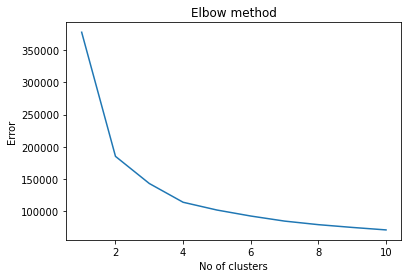

In [5]:
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

Based on the curve, 6 clusters are used.

**Classification**

In [6]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=500, random_state=42)

Y_KMeans = kmeans.fit(X_KMeans)

In [7]:
# Assign label
X_group = X_KMeans.copy()
X_group['cluster_id'] = kmeans.labels_
X_group.head()

,4,5,6,7,8,9,10,11,12,13,...,60,61,62,63,64,65,66,67,68,cluster_id
464,0.51950,0.57864,0.63714,0.64732,0.67500,0.67774,0.68980,0.69454,0.69234,0.67418,...,0.65592,0.61508,0.53592,0.49996,0.49064,0.52672,0.50306,0.58068,0.62020,0
465,0.53694,0.54528,0.59784,0.63970,0.65370,0.65422,0.68336,0.69858,0.65140,0.63988,...,0.47894,0.32178,0.20738,0.12034,0.03210,0.13908,0.17912,0.24692,0.30328,2
466,0.55552,0.58060,0.64768,0.68540,0.67414,0.67482,0.69040,0.69288,0.63874,0.59288,...,0.41846,0.25602,0.13288,0.04092,-0.03880,0.11154,0.11886,0.20148,0.26276,2
467,0.55560,0.63836,0.66420,0.70210,0.69084,0.71550,0.72062,0.72310,0.68032,0.60178,...,0.37740,0.24368,0.16522,0.09862,0.03156,0.12450,0.13378,0.21640,0.29612,2
1215,0.70558,0.74582,0.74244,0.73444,0.75022,0.73344,0.73354,0.73058,0.73094,0.71617,...,0.62406,0.58591,0.49347,0.54397,0.51235,0.55181,0.59130,0.67986,0.69842,1


In [8]:
# Checking how many data points are there in each cluster
X_group['cluster_id'].value_counts()

5    51797
4    41958
2    30122
1    28829
0    25071
3    14512
Name: cluster_id, dtype: int64

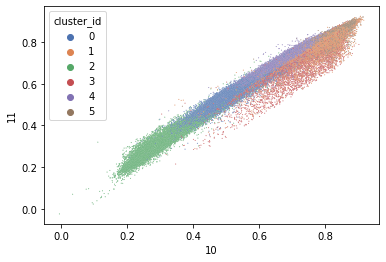

In [9]:
# Scatter plot 
sns.scatterplot(x=10, y = 11, hue = 'cluster_id', s=1, data = X_group, palette="deep");

**Validation**

In [10]:
# Read validation data
DF_Validation = pd.read_csv('output/4/validation_data/validation_paddy.csv')

X_Validation = DF_Validation.T


In [11]:
# Y true
Y_Validation = np.full((250,), 2, dtype='int32')
Y_Validation

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
# Y prediction
Y_Prediction = kmeans.predict(X_Validation)
Y_Prediction

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

*Validation Score*

In [13]:
# k-means performance
print("Validation score for paddy fields:", accuracy_score(Y_Validation, Y_Prediction))

Validation score for paddy fields: 0.996


**Create Raster of Land Cover**

In [14]:
# Add one image for projection and shape reference
raster = rasterio.open("input/ndvi_2011/2011_07_28.tif")

In [15]:
clust_kmean = pd.DataFrame()
clust_kmean['id'] = X_KMeans.index
clust_kmean['class'] = kmeans.labels_

In [16]:
# Check the shape
raster.read().shape

(1, 521, 753)

In [17]:
# Re-arrange cluster range
indx = []
for i in range(0,392313):
    indx.append(i)
    
Index = pd.DataFrame()
Index['id'] = indx

df1 = Index.set_index('id')
df2 = clust_kmean.set_index('id')
df2 = clust_kmean.set_index(df2.index.astype('int64')).drop(columns=['id'])
mask = df2.index.isin(df1.index)
df1['cluster'] = df2.loc[mask, 'class']

In [18]:
# Reshape the cluster array
array = np.array(df1['cluster'])
n_array = array.reshape(raster.read().shape)

In [19]:
# Data dir
data_dir = "output/5/land_cover"

# Output raster
out_tif = os.path.join(data_dir, "land_cover.tif")

# Copy the metadata
out_meta = raster.meta.copy()
out_meta

# Update the metadata
out_meta.update({'driver': 'GTiff',
                 'dtype': 'float32',
                 'nodata': None,
                 'width': raster.shape[1],
                 'height': raster.shape[0],
                 'crs': raster.crs,
                 'count':1,
                 'transform': raster.transform
                })

In [20]:
with rasterio.open(out_tif, "w", **out_meta) as dest:
    dest.write(n_array.astype(np.float32))

**Create Raster of Paddy**

In [21]:
Paddy_DF = X_group.loc[X_group['cluster_id'] == 2]

In [22]:
Land_cover = rasterio.open('output/5/land_cover/land_cover.tif').read()

Paddy = np.where(Land_cover != 2, np.nan, Land_cover)

In [23]:
# Data dir
data_dir = "output/5/paddy_area"

# Output raster
out_tif = os.path.join(data_dir, "paddy_area.tif")

# Copy the metadata
out_meta = raster.meta.copy()
out_meta

# Update the metadata
out_meta.update({'driver': 'GTiff',
                 'dtype': 'float32',
                 'nodata': None,
                 'width': raster.shape[1],
                 'height': raster.shape[0],
                 'crs': raster.crs,
                 'count':1,
                 'transform': raster.transform
                })

In [24]:
with rasterio.open(out_tif, "w", **out_meta) as dest:
    dest.write(Paddy.astype(np.float32))

**Mask non-paddy area**

In [25]:
# Read Shape file
with fiona.open("input/non_paddy_area/non_stu_area.shp", "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

# Mask area
raster_fp = "output/5/paddy_area/paddy_area.tif"
with rasterio.open(raster_fp) as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=False)
    out_meta = src.meta

out_image = np.where(out_image == 0, np.nan, out_image)

# Save clipped imagery
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

out_fp = "output/5/paddy_area/paddy_area.tif"

with rasterio.open(out_fp, "w", **out_meta) as dest:
    dest.write(out_image)

**Visualize result of paddy area**

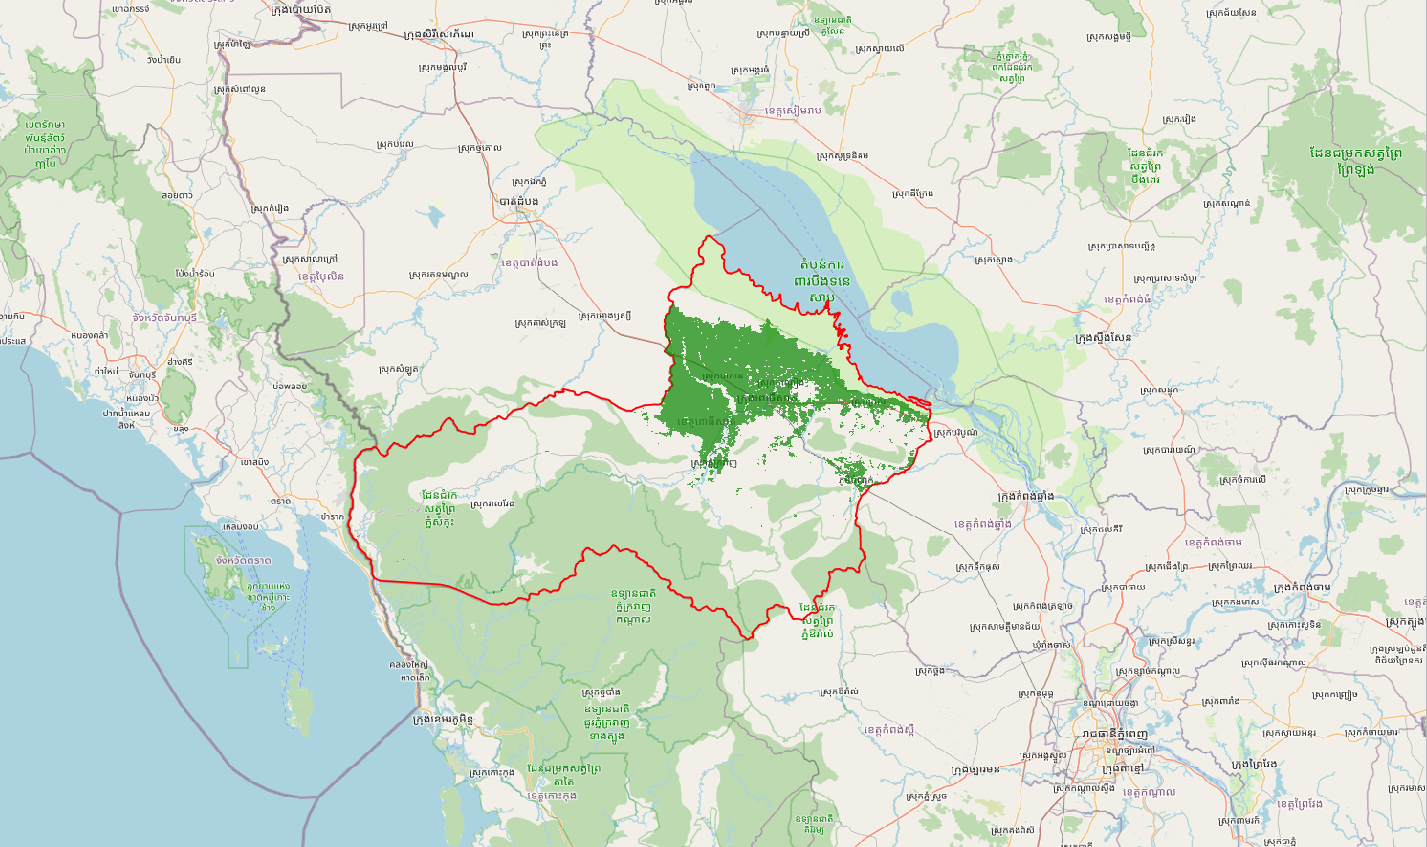

In [26]:
from IPython.display import Image
Image(filename="images/paddy-area-result.png")

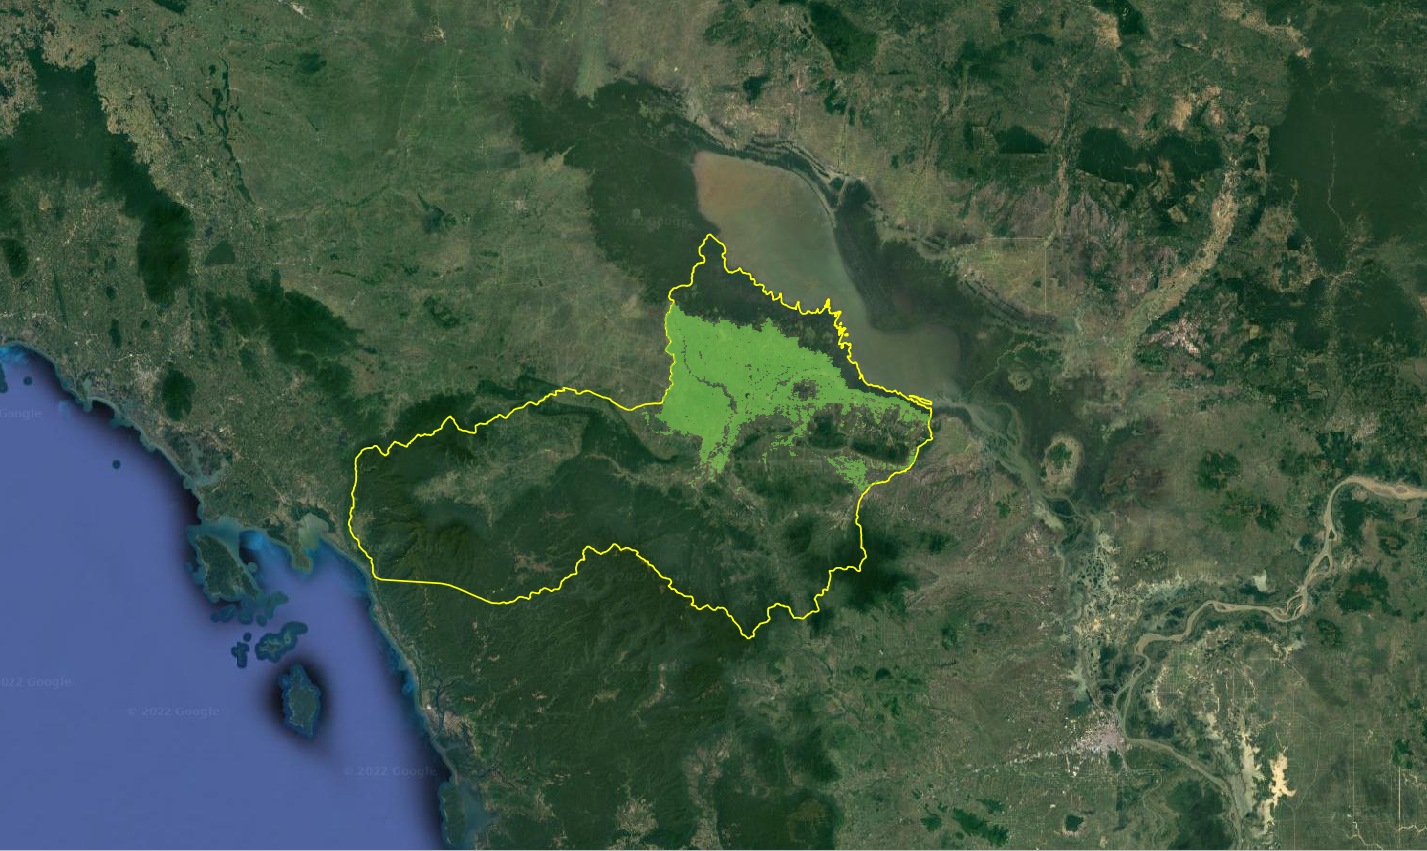

In [27]:
Image(filename="images/paddy-area-result-satellite.png")

---